<img src="precision-recall.png" width="50%" height="50%">

*<center><font color='gray'>kflu.github.io/2016/08/26/2016-08-26-visualizing-precision-recall</font></center>*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

In [3]:
df = pd.read_csv("auc-case-predictions.csv")

In [4]:
df.sample(5)

,actual,prediction
5,0,0.255509
97,1,0.630273
99,1,0.352507
67,1,0.958512
71,1,0.221029


In [5]:
#thresholds = list(np.array(list(range(0, 105, 1)))/100)
thresholds = list(np.array(list(range(0, 1000+1, 1)))/1000)

roc_point = []

for threshold in thresholds:

    tp = 0; fp = 0; fn = 0; tn = 0

    for index, instance in df.iterrows():
        actual = instance["actual"]
        prediction = instance["prediction"]

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1: 
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1

    #print(tp, fp, fn, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    #print(tpr, fpr)
    roc_point.append([tpr, fpr])

In [6]:
pivot = pd.DataFrame(roc_point, columns = ["x", "y"])
pivot["threshold"] = thresholds

In [12]:
pivot.sample(10)

,x,y,threshold
517,0.72,0.24,0.517
476,0.76,0.28,0.476
679,0.42,0.12,0.679
551,0.66,0.24,0.551
586,0.56,0.20,0.586
747,0.34,0.04,0.747
418,0.80,0.40,0.418
622,0.52,0.16,0.622
375,0.84,0.44,0.375
582,0.56,0.20,0.582


In [7]:
pivot[pivot['threshold'] == 0.5]

,x,y,threshold
500,0.74,0.24,0.5


# ROC Curve

Text(0,0.5,'true positive rate')

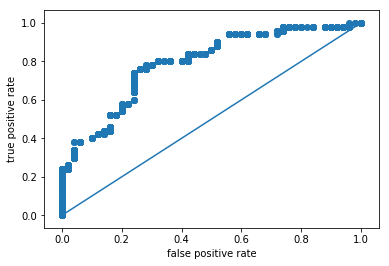

In [8]:
plt.scatter(pivot.y, pivot.x)
plt.plot([0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# AUC Score

In [9]:
auc = round(abs(np.trapz(pivot.x, pivot.y)), 4)

In [10]:
auc

0.7918